# Project: Home SalesPrices Prediction 
<font color='red'>Goal:</font> <font color='blue'>To build a model to predict House prices🏡 based on explanatory variables.</font>

# The Inference Problem
<font color='red'><b> X</b></font><font color='black'>:Features like MSZoning, LotFrontage, LotArea,Street, Alley, LotShape, LandContour,Utilities etc. are our explanatory variables.</font>

<font color='red'><b> y</b></font><font color='black'>:SalePrice.</font>

<font color='red'><b> Model</b></font><font color='black'>:We will train a set of different models: KNN, Naive Bayes, Linear Regression, and possibly others based on available time.</font>

<font color='red'><b> Parameters</b></font><font color='black'>:we plan to train our models using both parameterized and unparameterized techniques to encode the modles using the training data.</font>

<font color='red'><b> Cost Function</b></font><font color='black'>:Each model will use a different cost function.</font>

<font color='red'><b> Objective</b></font><font color='black'>:Each models will have their objective different, for eg. KNN will have the nearest neighbor, maximum likelihood for NB etc.</font>


### <font color='blue'><b><u>Data Source</b></u></font>
The data source is from Kaggle. 
/house-prices-advanced-regression-techniques/train.csv")

### <font color='blue'><b><u>Features and its definitions:</b></u></font> 
The Kaggle file contains 80 features with both discrete and continous values. Here are a few to list:
* Id
* MSSubClass - Identifies the type of dwelling involved in the sale.
* MSZoning - Identifies the general zoning classification of the sale.
* LotFrontage -  Linear feet of street connected to property
* LotArea - Lot size in square feet
* Street - Type of road access to property
* Alley - Type of alley access to property
* LotShape - General shape of property
* LandContour - Flatness of the property
* Utilities - Type of utilities available
* LotConfig - Lot configuration
* LandSlope - Slope of property
* Neighborhood - Physical locations within Ames city limits
* Condition1 - Proximity to various conditions
* BldgType - Type of dwelling
* HouseStyle - Style of dwelling
* YearBuilt - Original construction date
* FullBath - Full bathrooms above grade
* SaleCondition -  Condition of sale ( Depenedent variable, the one we ought to predict)


### <font color='blue'><b><u> File logistics: Feature datatype conversions and create a preprocessed file</b></u></font> 
The file has features with object type datatypes which we convert into float as part of feature engineering.
A function index_strings(arr) does the conversion

### <font color='blue'><b>Test plan: </b></font> 
1. Split the train data into train and dev; 80-20 rule
2. Extract Dependent variable(salesprice) and assign to train/dev/test and assign to train/dev/test_labels
3. Create a preprocessed file for train and dev which has all the object type datatypes converted into float.
4. Train the training data and test on the dev and run predictions on the test data.
5. Run, validate, score and repeat until the best F1 score is achieved( best of precision and recall)
6. Models to include
    * KNN
    * NB
    * OLS Linear Regression

### Navigation
* [pip installers](#pip-installers)
* [imports](#imports)
* [List files in the current directory](#List-files-in-the-current-directory)
* [load data](#load-data)
* [columns](#columns)
* [Explortory Data Analysis](#Explortory-Data-Analysis)
    * [File structure](#File-structure)
    * [Index_Strings() and get_index() function](#Index_Strings()-and-get_index()-function)
    * [PreProcessed File](#PreProcessed-File)
* [Feature-Engineering](#Feature-Engineering)
    * [File structure](#File-structure)
    * [Feature Selection](#Feature-Selection)
        * [Method 1: Variance](#Method-1:-Variance)
        * [Method 2: Correlation](#Method-2:-Correlation)
        * [Method 3:  Entropy or Information Gain](#Method-3:-Entropy-or-Information-Gain)        

### pip installers
#### [ To Navigation](#Navigation)

In [ ]:
# pip install mlxtend # helps for ML and data science Apps in python.
# pip install pandas_profiling
# pip install autoviz
# pip install wordcloud
# compartive study between mlxtend and sns pairplot

### imports
#### [ To Navigation](#Navigation)

In [344]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # sets the back ground formatting to override the matplotlib defaults.
import pandas as pd

from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from pandas_profiling import ProfileReport

# file splits
from sklearn.model_selection import train_test_split 

# libraires for pre processing selection
from sklearn import preprocessing

# libraires for feature selection

from sklearn.feature_selection import SelectKBest # for feature selection
from sklearn.feature_selection import chi2 # for feature selection
from sklearn.feature_selection import mutual_info_classif # for feature selection # entropy
from sklearn.ensemble import ExtraTreesClassifier # for feature importance
from sklearn.feature_selection import mutual_info_regression # mutual info regression
from sklearn.feature_selection import SelectPercentile # for selecting percentile
from sklearn.preprocessing import StandardScaler # for feature scaling

#model

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# confusion matrix essentails
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost


### List files in the current directory
#### [ To Navigation](#Navigation)

In [144]:
#Replace /w207_final_project with your current folder.
import os
print(os.listdir("../w207_final_project"))

['.ipynb_checkpoints', 'data_description.txt', 'joseph', 'project deadlines.txt', 'sample_submission.csv', 'test.csv', 'train.csv', 'w207_baseline_Group4.ipynb', 'w207_baseline_Paco.ipynb', 'w207_baseline_VK.ipynb', 'w207_final_project_vk.ipynb', 'w207_housing_dataset_EDA_VasudevKillada.html']


### load data
#### [ To Navigation](#Navigation)

In [254]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)
#print("Number of rows and columns of training data:",train_data.shape)
train_data.info() # transform the data to read better.
#train_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

### columns
#### [ To Navigation](#Navigation)

In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### train data box plot
#### [ To Navigation](#Navigation)


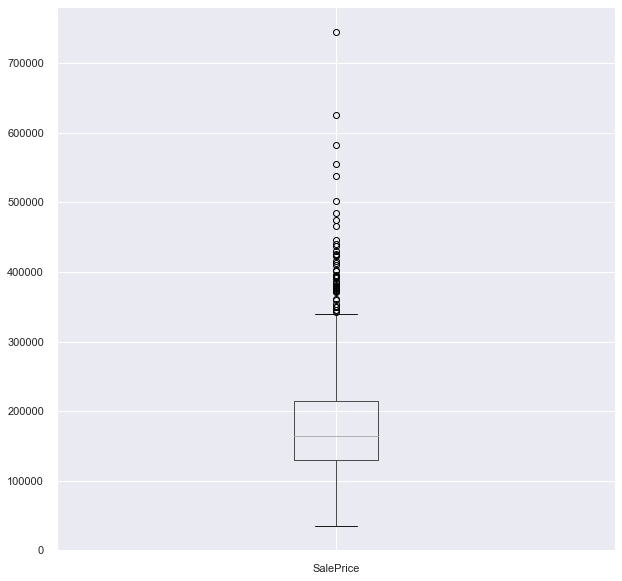

In [146]:
# boxplot to get an idea of average sale price to understand the data
train_data.boxplot(['SalePrice'], figsize=(10, 10))
pass

In [ ]:
# train_data.hist(bins=50, figsize=(15, 15))
# pass

In [147]:
train_data['SaleCondition'].value_counts()

Normal     964
Partial     98
Abnorml     77
Family      18
Alloca       7
AdjLand      4
Name: SaleCondition, dtype: int64

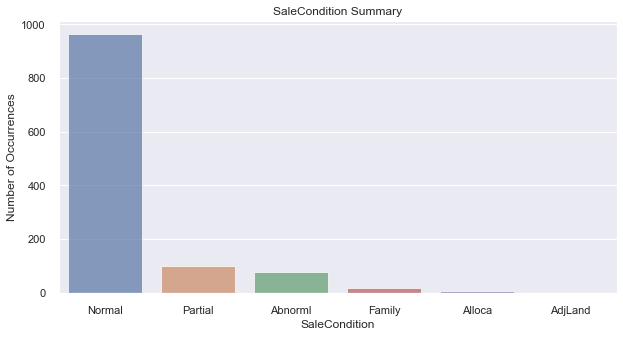

In [148]:
op_count = train_data['SaleCondition'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('SaleCondition Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('SaleCondition', fontsize=12)
plt.show()
# train_data['SaleCondition'].value_counts().hist()

## Exploratory Data Analysis
#### [ To Navigation](#Navigation)

### File structure
#### [ To Navigation](#Navigation)

In [243]:
train_features = train_data.loc[:, train_data.columns != 'SalePrice']
train_labels = train_data['SalePrice']
dev_features = dev_data.loc[:, dev_data.columns != 'SalePrice']
dev_labels = dev_data['SalePrice']
test_features = test_data.loc[:, test_data.columns != 'SalePrice']


# #output
# y= housing.median_income

# #input
# x=housing.drop('median_income',axis=1)

#splitting
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# #printing shapes of testing and training sets :
print("shape of original dataset :", train_data.shape)
print("shape of input - training set", train_features.shape)
print("shape of output - training set", train_labels.shape)
print("shape of original dev dataset :", dev_data.shape)
print("shape of input - dev set", dev_features.shape)
print("shape of output - dev set", dev_labels.shape)

shape of original dataset : (1168, 81)
shape of input - training set (1168, 80)
shape of output - training set (1168,)
shape of original dev dataset : (292, 81)
shape of input - dev set (292, 80)
shape of output - dev set (292,)


In [244]:
print(len(train_data), "train + ", len(dev_data), "dev",len(test_data), "test")

1168 train +  292 dev 292 test


### Index_Strings() and get_index() function
#### [ To Navigation](#Navigation)

In [245]:
count = 0

def index_strings(arr):
    global count
    count = 0
    str_dict = {}
    def get_index(s):
        global count
        if s not in str_dict:
            str_dict[s] = count
            count += 1
        return str_dict[s]
    
    return list(map(get_index, arr))
    

In [210]:
# Check Duplicate before we drop the Id column in the next step PreProcesed File.
sum(train_data.index.duplicated() == True)
# The result is 0, meaning there is no duplicate value contain in Id. 

0

In [246]:
# Check missing record for each column
df_null = train_data.isnull().sum().sort_values(ascending=False) 
df_null = df_null[df_null > 0]
df_null.sort_values(inplace=True, ascending = False)
df_null

PoolQC          1162
MiscFeature     1122
Alley           1094
Fence            935
FireplaceQu      547
LotFrontage      217
GarageYrBlt       64
GarageCond        64
GarageType        64
GarageFinish      64
GarageQual        64
BsmtFinType1      28
BsmtExposure      28
BsmtCond          28
BsmtQual          28
BsmtFinType2      28
MasVnrType         6
MasVnrArea         6
Electrical         1
dtype: int64

In [247]:
# Check missing record for each column (in %)
df_null = round(train_data.isnull().sum() / len(train_data) * 100, 2)

df_null = df_null[df_null > 0]
df_null.sort_values(inplace=True, ascending = False)
df_null

PoolQC          99.49
MiscFeature     96.06
Alley           93.66
Fence           80.05
FireplaceQu     46.83
LotFrontage     18.58
GarageYrBlt      5.48
GarageType       5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
BsmtFinType2     2.40
BsmtFinType1     2.40
BsmtExposure     2.40
BsmtCond         2.40
BsmtQual         2.40
MasVnrArea       0.51
MasVnrType       0.51
Electrical       0.09
dtype: float64

In [248]:
# features with missing value
missing_f = train_data.columns[train_data.isnull().any(axis=0)]
train_data.columns[train_data.isnull().any(axis=0)]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [249]:
train_data[missing_f].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   951 non-null    float64
 1   Alley         74 non-null     object 
 2   MasVnrType    1162 non-null   object 
 3   MasVnrArea    1162 non-null   float64
 4   BsmtQual      1140 non-null   object 
 5   BsmtCond      1140 non-null   object 
 6   BsmtExposure  1140 non-null   object 
 7   BsmtFinType1  1140 non-null   object 
 8   BsmtFinType2  1140 non-null   object 
 9   Electrical    1167 non-null   object 
 10  FireplaceQu   621 non-null    object 
 11  GarageType    1104 non-null   object 
 12  GarageYrBlt   1104 non-null   float64
 13  GarageFinish  1104 non-null   object 
 14  GarageQual    1104 non-null   object 
 15  GarageCond    1104 non-null   object 
 16  PoolQC        6 non-null      object 
 17  Fence         233 non-null    object 
 18  MiscFeature   46 non-null 

In [250]:
# Count of different object type
train_data.dtypes.value_counts(dropna=False)

object     43
int64      35
float64     3
dtype: int64

### PreProcessed File
#### [ To Navigation](#Navigation)

In [251]:
# we are creating a preprocessed train data which includes dropping "Id" columns in both train and dev
dtype_o = list(train_data.dtypes)[2]
dtype_o_columns = [index for index in range(len(list(train_features.dtypes))) if list(train_features.dtypes)[index] == dtype_o]
preprocessed_train = train_features.copy()

# converting the object type to the int type 
for column_index in dtype_o_columns:
    preprocessed_train.iloc[:, column_index] = index_strings(list(train_features.iloc[:, column_index]))
preprocessed_train.fillna(0,inplace=True)
preprocessed_train = preprocessed_train.drop("Id", axis=1) # dropping the id column from the preprocessed train.
#preprocessed_train.head()
preprocessed_dev = dev_features.copy()
for column_index in dtype_o_columns:
    preprocessed_dev.iloc[:, column_index] = index_strings(list(dev_features.iloc[:, column_index]))
preprocessed_dev.fillna(0,inplace=True)
preprocessed_dev = preprocessed_dev.drop("Id", axis=1) # dropping the id column from the preprocessed train.

#import Data

#train_data.head().T
#get some information about our Data-Set
train_data.info()
train_data.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,730.904966,425.369088,1.0,360.75,732.5,1101.75,1460.0
MSSubClass,1168.0,56.849315,42.531862,20.0,20.00,50.0,70.00,190.0
LotFrontage,951.0,70.343849,24.897021,21.0,59.00,70.0,80.00,313.0
LotArea,1168.0,10689.642123,10759.366198,1300.0,7587.25,9600.0,11700.00,215245.0
OverallQual,1168.0,6.121575,1.367619,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.584760,1.116062,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.965753,30.675495,1872.0,1953.00,1972.0,2001.00,2010.0
YearRemodAdd,1168.0,1984.897260,20.733955,1950.0,1966.00,1994.0,2004.00,2010.0
MasVnrArea,1162.0,103.771945,173.032238,0.0,0.00,0.0,166.00,1378.0
BsmtFinSF1,1168.0,446.023973,459.070977,0.0,0.00,384.5,721.00,5644.0


In [255]:
# we are creating a preprocessed train data which includes dropping "Id" columns in both train and dev
dtype_o = list(train_data.dtypes)[2]
dtype_o_columns = [index for index in range(len(list(train_data.dtypes))) if list(train_data.dtypes)[index] == dtype_o]


# converting the object type to the int type 
for column_index in dtype_o_columns:
    train_data.iloc[:, column_index] = index_strings(list(train_data.iloc[:, column_index]))
train_data.fillna(0,inplace=True)
train_data = train_data.drop("Id", axis=1) # dropping the id column from the  train.



for column_index in dtype_o_columns:
    dev_data.iloc[:, column_index] = index_strings(list(dev_data.iloc[:, column_index]))
dev_data.fillna(0,inplace=True)
dev_data = dev_data.drop("Id", axis=1) # dropping the id column from the  dev.

#import Data

#train_data.head().T
#get some information about our Data-Set
train_data.info()
train_data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int64  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   int64  
 5   Alley          1168 non-null   int64  
 6   LotShape       1168 non-null   int64  
 7   LandContour    1168 non-null   int64  
 8   Utilities      1168 non-null   int64  
 9   LotConfig      1168 non-null   int64  
 10  LandSlope      1168 non-null   int64  
 11  Neighborhood   1168 non-null   int64  
 12  Condition1     1168 non-null   int64  
 13  Condition2     1168 non-null   int64  
 14  BldgType       1168 non-null   int64  
 15  HouseStyle     1168 non-null   int64  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBu

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,56.849315,42.531862,20.0,20.00,50.0,70.0,190.0
MSZoning,1168.0,0.290240,0.644407,0.0,0.00,0.0,0.0,4.0
LotFrontage,1168.0,57.274829,35.408581,0.0,40.00,63.0,79.0,313.0
LotArea,1168.0,10689.642123,10759.366198,1300.0,7587.25,9600.0,11700.0,215245.0
Street,1168.0,0.003425,0.058445,0.0,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
MoSold,1168.0,6.356164,2.670707,1.0,5.00,6.0,8.0,12.0
YrSold,1168.0,2007.818493,1.322639,2006.0,2007.00,2008.0,2009.0,2010.0
SaleType,1168.0,0.258562,0.926574,0.0,0.00,0.0,0.0,8.0
SaleCondition,1168.0,0.321062,0.786890,0.0,0.00,0.0,0.0,5.0


In [264]:
correlation = train_data.corr()
# Rank the correlation by features
correlation['SalePrice'].sort_values(ascending=False).head(21)

SalePrice       1.000000
OverallQual     0.785555
GrLivArea       0.695652
GarageCars      0.640991
GarageArea      0.624139
TotalBsmtSF     0.597766
1stFlrSF        0.587883
ExterQual       0.555269
FullBath        0.552546
BsmtQual        0.534765
TotRmsAbvGrd    0.520388
YearBuilt       0.516501
YearRemodAdd    0.508593
MasVnrArea      0.457608
Fireplaces      0.457549
KitchenQual     0.453656
FireplaceQu     0.397229
BsmtFinSF1      0.359460
HeatingQC       0.341029
MasVnrType      0.332665
WoodDeckSF      0.329843
Name: SalePrice, dtype: float64

In [258]:
correlation.shape

(80, 80)

In [225]:
top_cor

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.558124,0.538251,0.529557,0.463751,0.581783,0.539661,0.416332,0.587487,0.550476,0.785555
YearBuilt,0.558124,1.000000,0.587311,0.391372,0.271891,0.171195,0.460457,0.068115,0.525740,0.466610,0.516501
YearRemodAdd,0.538251,0.587311,1.000000,0.287686,0.233857,0.281727,0.449488,0.186659,0.414912,0.364826,0.508593
TotalBsmtSF,0.529557,0.391372,0.287686,1.000000,0.827382,0.450684,0.311452,0.269915,0.437991,0.490728,0.597766
1stFlrSF,0.463751,0.271891,0.233857,0.827382,1.000000,0.557241,0.360025,0.389285,0.437094,0.489108,0.587883
GrLivArea,0.581783,0.171195,0.281727,0.450684,0.557241,1.000000,0.617812,0.820718,0.466481,0.478249,0.695652
FullBath,0.539661,0.460457,0.449488,0.311452,0.360025,0.617812,1.000000,0.546980,0.472367,0.410628,0.552546
TotRmsAbvGrd,0.416332,0.068115,0.186659,0.269915,0.389285,0.820718,0.546980,1.000000,0.356827,0.335434,0.520388
GarageCars,0.587487,0.525740,0.414912,0.437991,0.437094,0.466481,0.472367,0.356827,1.000000,0.882550,0.640991
GarageArea,0.550476,0.466610,0.364826,0.490728,0.489108,0.478249,0.410628,0.335434,0.882550,1.000000,0.624139


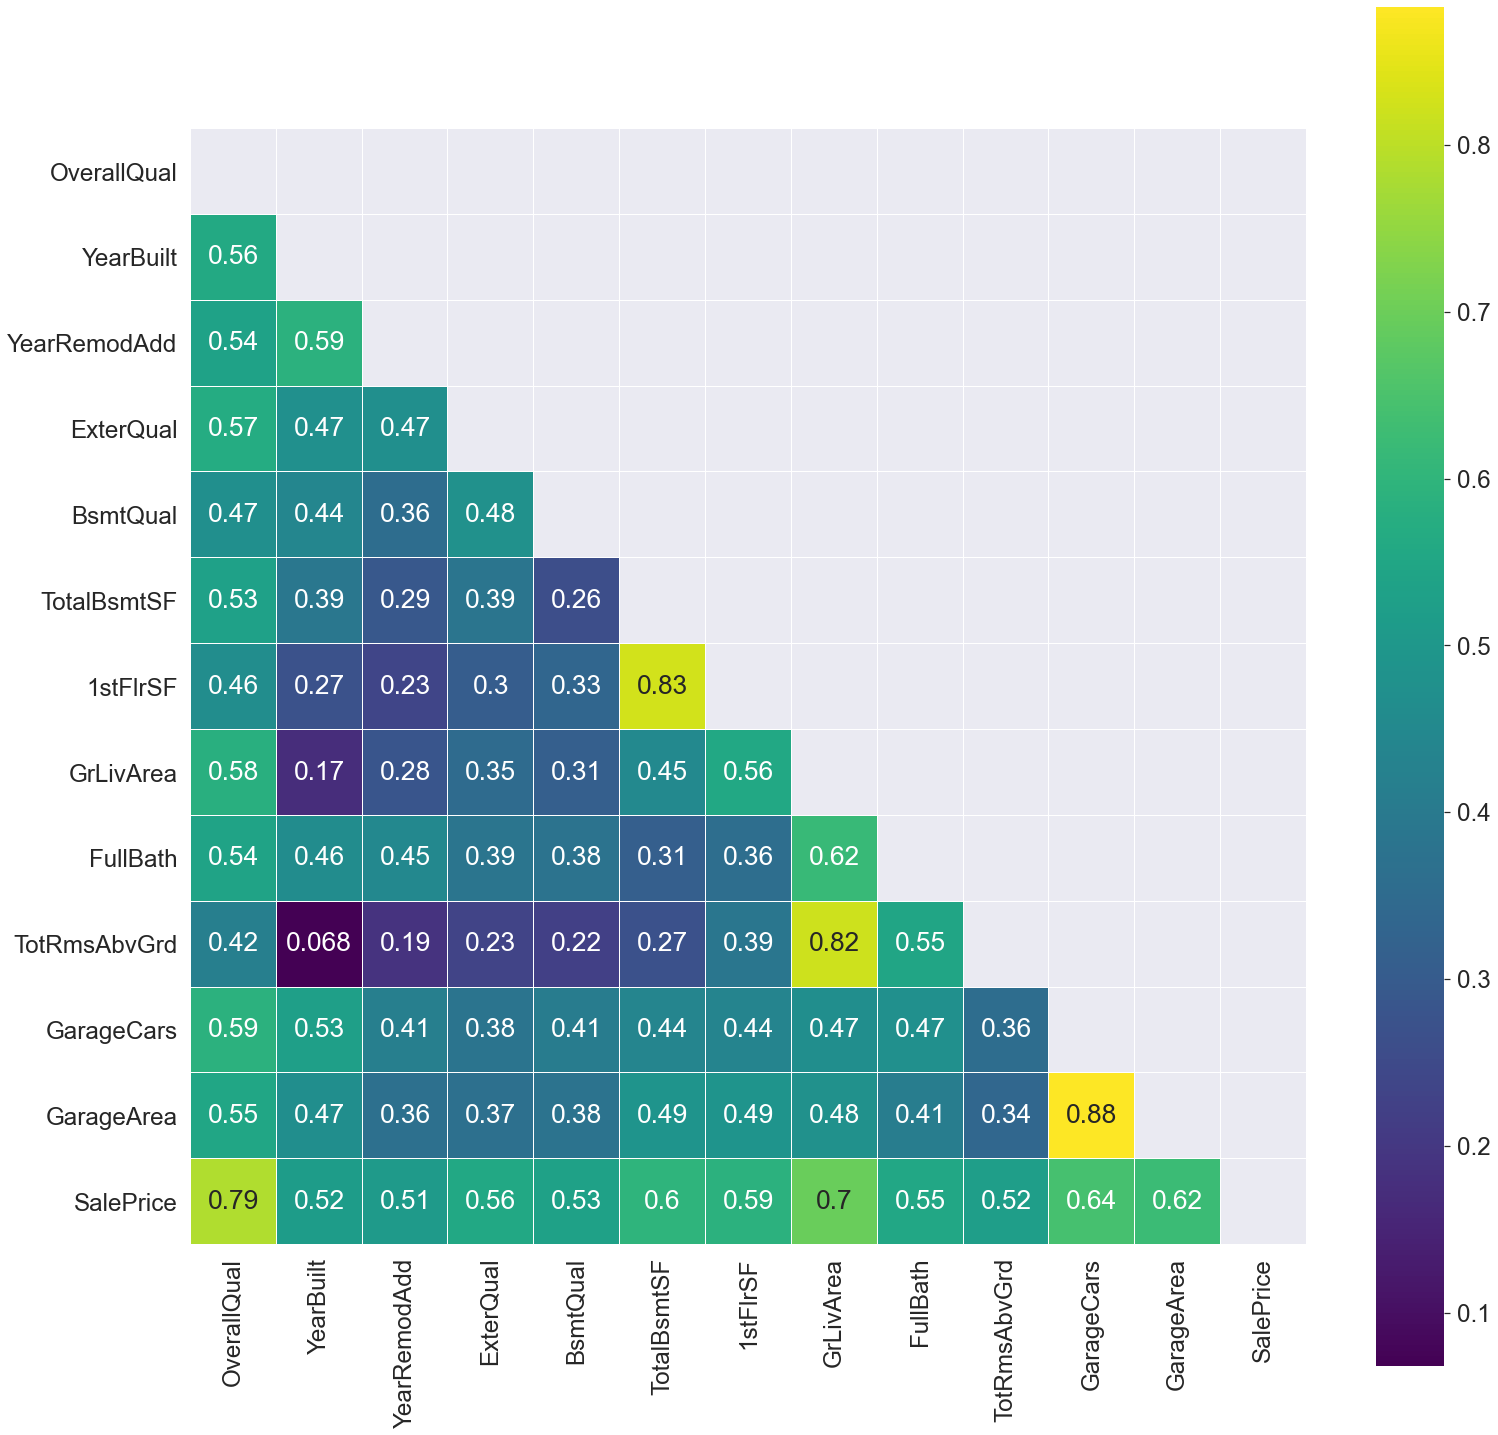

In [259]:
# Only Keep feature with correlation with SalePrice that higher than 0.5 in absolute value
top_corr_feature = correlation.index[abs(correlation['SalePrice']) > 0.5] 

plt.subplots(figsize=(25,25))
sns.set(font_scale=2.2)
top_cor = train_data[top_corr_feature].corr()
mask = np.zeros_like(top_cor) 
mask[np.triu_indices_from(mask)] = True # Optional mask to remove the repetitive value
sns.heatmap(top_cor, square=True, annot=True,  mask = mask, cmap = 'viridis',linecolor ='white', linewidths=0.01)
pass

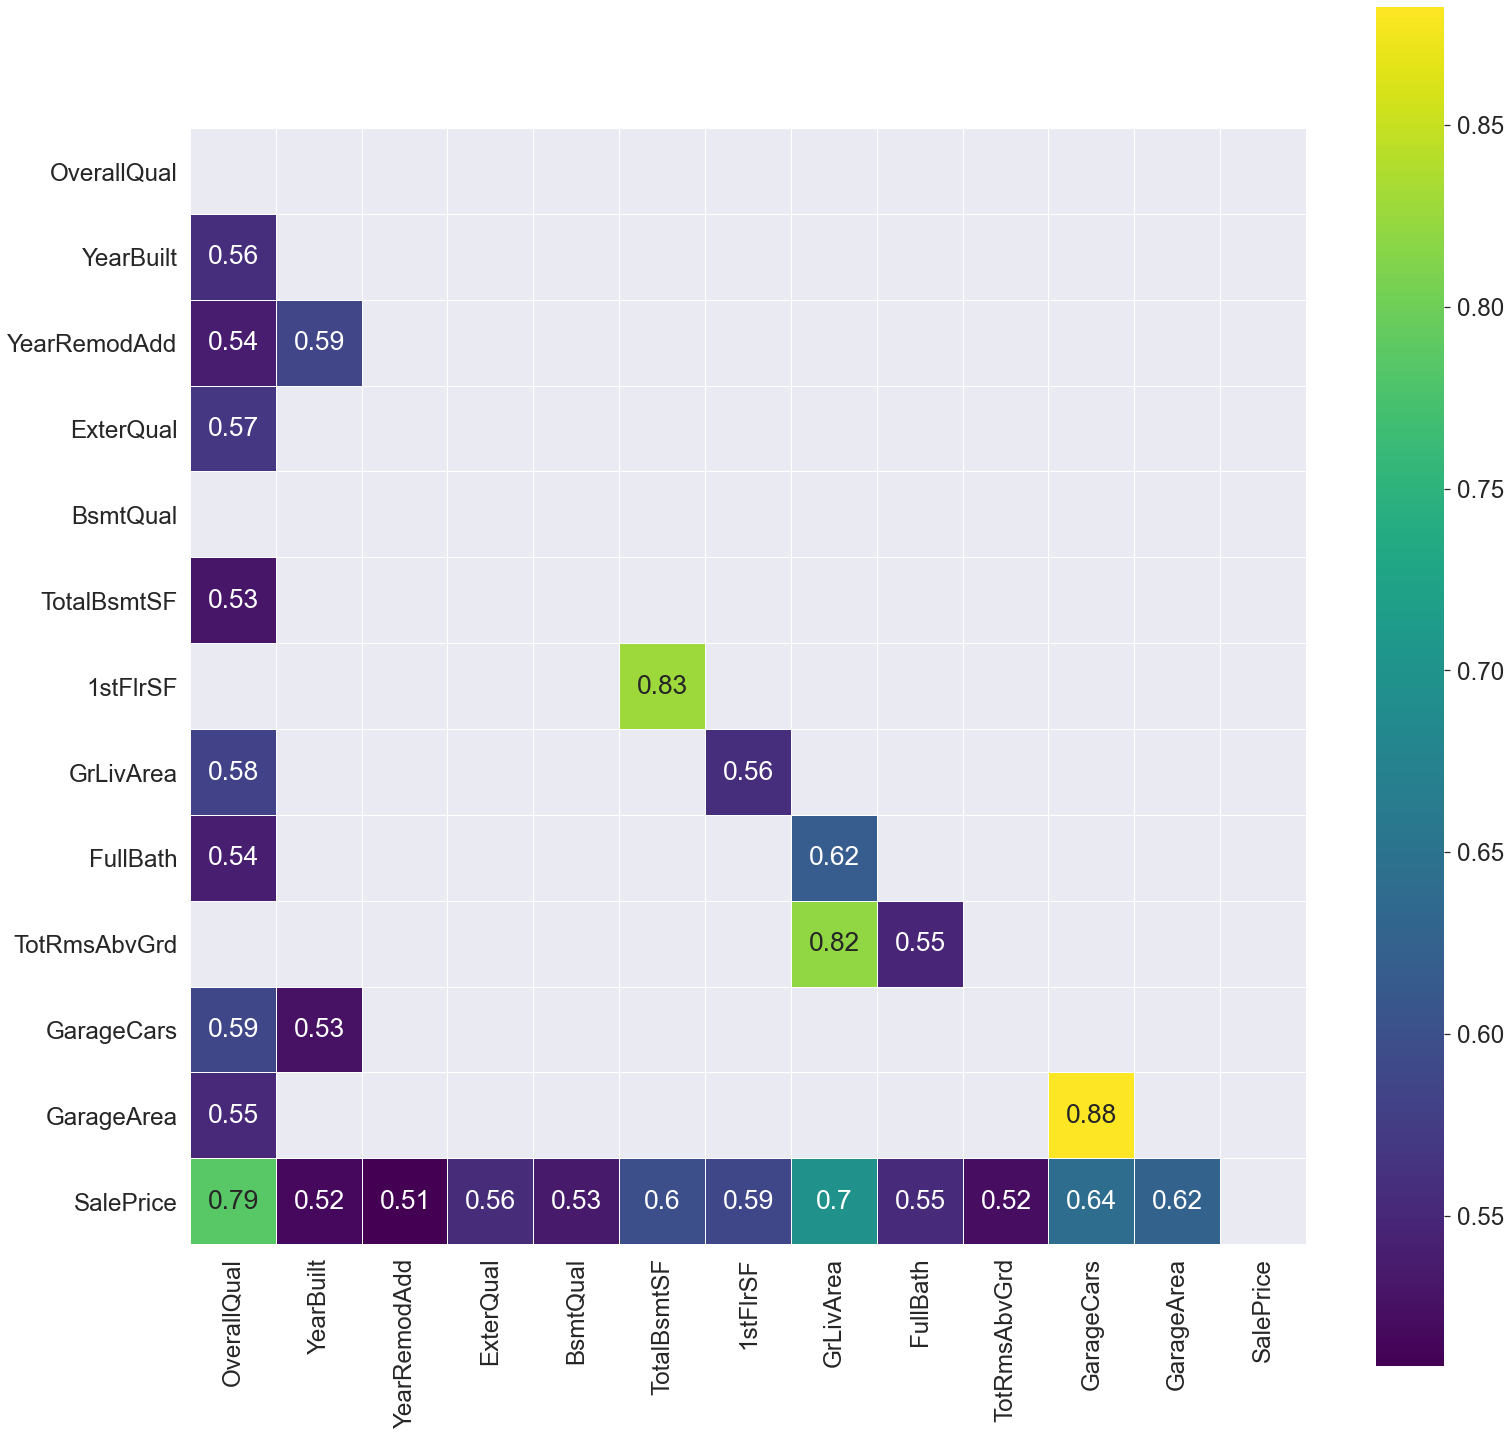

In [260]:
# Another view that further hide any correlation that lower than 0.5 in absolute value
top_corr_feature = correlation.index[abs(correlation['SalePrice']) > 0.5] 

plt.subplots(figsize=(25,25))
sns.set(font_scale=2.2)
top_cor = train_data[top_corr_feature].corr()
mask = np.zeros_like(top_cor) 
mask[np.where(abs(top_cor) < 0.5)] = True # Optional mask to hide low correlation
mask[np.triu_indices_from(mask)] = True # Optional mask to hide the repetitive value

sns.heatmap(top_cor, square=True, annot=True,  mask = mask, cmap = 'viridis',linecolor ='white', linewidths=0.01)
pass

In [289]:
correlation

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.292578,-0.202373,-0.116501,0.056052,0.116928,-0.100155,-0.017532,-0.025373,-0.050723,...,0.003578,0.011446,-0.085753,-0.037401,-0.006216,-0.014139,-0.028758,0.056349,-0.003418,-0.088081
MSZoning,0.292578,1.000000,-0.076542,-0.158740,-0.003662,0.260049,-0.175229,-0.002043,-0.013190,-0.088838,...,-0.031989,-0.029966,-0.063791,-0.059869,-0.025149,0.054401,-0.025606,0.077995,0.061106,-0.154579
LotFrontage,-0.202373,-0.076542,1.000000,0.087948,0.004928,-0.012369,-0.120031,-0.007748,-0.047370,-0.145447,...,0.129274,0.168746,0.004317,-0.056129,-0.066795,0.036161,-0.011595,0.068638,0.151002,0.201372
LotArea,-0.116501,-0.158740,0.087948,1.000000,0.241667,-0.056272,0.317729,0.358661,0.010031,0.129124,...,0.086463,0.119225,-0.027774,0.121485,0.038358,0.003973,-0.005098,-0.019286,-0.004415,0.266204
Street,0.056052,-0.003662,0.004928,0.241667,1.000000,-0.014529,0.032659,0.059130,-0.001716,0.004411,...,-0.004162,-0.003898,-0.025180,0.060588,0.013121,-0.013311,0.008048,-0.016365,-0.023928,-0.015487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.014139,0.054401,0.036161,0.003973,-0.013311,-0.021264,0.030308,0.044003,-0.058732,-0.015288,...,-0.045109,-0.044164,0.018388,0.009893,-0.009815,1.000000,-0.139848,0.035126,0.064195,0.041890
YrSold,-0.028758,-0.025606,-0.011595,-0.005098,0.008048,-0.039053,-0.022714,-0.041990,0.026160,0.021014,...,-0.074083,-0.057939,0.014158,0.028816,0.001849,-0.139848,1.000000,-0.023902,-0.126739,-0.009099
SaleType,0.056349,0.077995,0.068638,-0.019286,-0.016365,0.012449,-0.005032,-0.020305,0.055040,0.030426,...,-0.009161,-0.000615,-0.022819,-0.005249,-0.018867,0.035126,-0.023902,1.000000,0.246852,0.054477
SaleCondition,-0.003418,0.061106,0.151002,-0.004415,-0.023928,0.010988,-0.012842,0.009565,0.025268,-0.019891,...,0.101206,0.127862,-0.055621,-0.064843,-0.035847,0.064195,-0.126739,0.246852,1.000000,0.173296


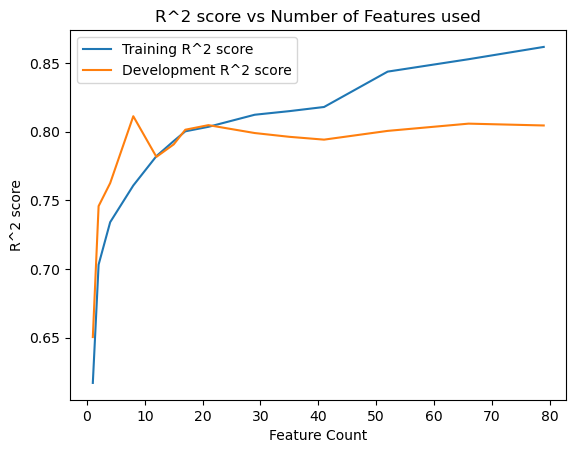

In [330]:
# To experiment: to plot R^2 score of Linear Regression 
# with different value of correlation threshold which gives different number of features and performance score


X_train = train_data 
y_train = train_labels 
X_dev = dev_data 
y_dev = dev_labels 
correlation = train_data.corr()

corr = np.arange(0.00, 0.8, 0.05)
coeff_used = np.empty(len(corr))
train_score = np.empty(len(corr))
dev_score = np.empty(len(corr))


for i, x in enumerate(corr):
    
    top_corr_list = correlation.index[abs(correlation['SalePrice']) >= x ].tolist()
    top_corr_list.remove('SalePrice')
    
    # set up the linear regressor
    linear_reg = LinearRegression()

    
    # fit the linear regressor with selected training data
    linear_reg.fit(X_train[top_corr_list], y_train)
    
    # Generate the R^2 on training set
    train_score[i] = linear_reg.score(X_train[top_corr_list],y_train)
        
    # Generate the R^2 on dev set
    dev_score[i] = linear_reg.score(X_dev[top_corr_list],y_dev)
    
    coeff_used[i] = len(top_corr_list)

# plot out
sns.reset_defaults()
plt.plot(coeff_used, train_score, label = "Training R^2 score")
plt.plot(coeff_used, dev_score, label = "Development R^2 score")
plt.legend()
plt.xlabel("Feature Count")
plt.ylabel("R^2 score")
plt.title("R^2 score vs Number of Features used")
plt.show()


In [265]:
# At 21 features the performance is optimum for both dev and train data.
pd.DataFrame({'Correlation Threshold': corr, 'Feature Count': coeff_used,'Train R^2':train_score,'Dev R^2': dev_score})

,Correlation Threshold,Feature Count,Train R^2,Dev R^2
0,0.00,79.0,0.861617,0.804454
1,0.05,66.0,0.852670,0.805786
2,0.10,52.0,0.843642,0.800511
3,0.15,41.0,0.817905,0.794142
4,0.20,35.0,0.814884,0.796193
5,0.25,29.0,0.812259,0.798948
6,0.30,21.0,0.803481,0.804689
7,0.35,17.0,0.800197,0.801358
8,0.40,15.0,0.793148,0.790723
9,0.45,15.0,0.793148,0.790723


In [269]:
# After 21 Independent features...the model performance is dropping. An ideal point for fit and generalize is 21 features.
correlation['SalePrice'].sort_values(ascending=False).head(22)

SalePrice       1.000000
OverallQual     0.785555
GrLivArea       0.695652
GarageCars      0.640991
GarageArea      0.624139
TotalBsmtSF     0.597766
1stFlrSF        0.587883
ExterQual       0.555269
FullBath        0.552546
BsmtQual        0.534765
TotRmsAbvGrd    0.520388
YearBuilt       0.516501
YearRemodAdd    0.508593
MasVnrArea      0.457608
Fireplaces      0.457549
KitchenQual     0.453656
FireplaceQu     0.397229
BsmtFinSF1      0.359460
HeatingQC       0.341029
MasVnrType      0.332665
WoodDeckSF      0.329843
2ndFlrSF        0.314030
Name: SalePrice, dtype: float64

In [300]:
best_features_df = correlation['SalePrice'].sort_values(ascending=False).head(22)
final_df = train_data[best_features_df.index]
final_df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual,FullBath,BsmtQual,...,YearRemodAdd,MasVnrArea,Fireplaces,KitchenQual,FireplaceQu,BsmtFinSF1,HeatingQC,MasVnrType,WoodDeckSF,2ndFlrSF
254,145000,5,1314,1,294,1314,1314,0,1,0,...,1957,0.0,0,0,0,922,0,0,250,0
1066,178000,6,1571,2,380,799,799,1,2,1,...,1994,0.0,1,0,1,0,1,0,0,772
638,85000,5,796,0,0,796,796,0,1,2,...,1950,0.0,0,0,0,0,1,0,328,0
799,175000,5,1768,1,240,731,981,0,1,1,...,1950,252.0,2,1,1,569,2,1,0,787
380,127000,5,1691,1,308,1026,1026,0,2,0,...,1950,0.0,1,1,2,218,0,0,0,665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,176432,6,1314,2,440,1314,1314,1,2,1,...,2006,0.0,1,1,2,24,1,0,0,0
1130,135000,4,1981,2,576,1122,1328,0,2,0,...,1950,0.0,2,1,1,622,0,0,431,653
1294,115000,5,864,2,572,864,864,0,1,0,...,1990,0.0,0,0,0,167,0,0,0,0
860,189950,7,1426,1,216,912,912,1,1,0,...,1998,0.0,1,1,2,0,1,0,0,514


In [296]:
best_features_df

Series([], Name: SalePrice, dtype: float64)

In [273]:
pd.DataFrame({'Alpha': alpha, 'Feature Count': coeff_used,'Train R^2':train_score,'Dev R^2': dev_score})

,Alpha,Feature Count,Train R^2,Dev R^2
0,0.1,17.0,1.0,1.0
1,1.0,11.0,1.0,1.0
2,10.0,3.0,1.0,1.0
3,100.0,1.0,1.0,1.0
4,1000.0,1.0,1.0,1.0
5,5000.0,1.0,1.0,1.0
6,10000.0,1.0,1.0,1.0
7,50000.0,1.0,1.0,1.0
8,100000.0,1.0,1.0,1.0
9,150000.0,1.0,1.0,1.0


In [281]:
y_train_log = np.log(y_train)
y_dev_log = np.log(y_dev)


### ProfileReport

In [266]:
# we chose not to use ProfileReport as it is time consuming and memory intensive.

# profile = ProfileReport(preprocessed_train, title='Group 4 EDA', explorative=True)
# profile.to_widgets()
# #profile.to_file("w207_housing_dataset_EDA_VasudevKillada.html")

### Autoviz

In [267]:
# we chose not to use ProfileReport as it is time consuming and memory intensive.
# from autoviz.AutoViz_Class import AutoViz_Class
# #plot_cols = ['SalePrice','LotArea',]
# plot_cols = ['LotFrontage','LotArea','HouseStyle','LotShape','SalePrice']
# AV = AutoViz_Class()
# scatterplotmatrix(train_data[plot_cols].values, figsize=(12,10), names=plot_cols,alpha=0.5)
# plt.tight_layout()
# plt.show()

### SalePrice Distribution Analysis

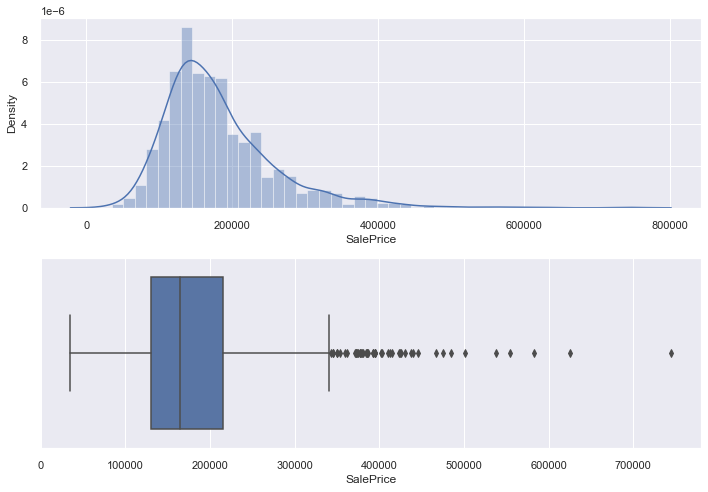

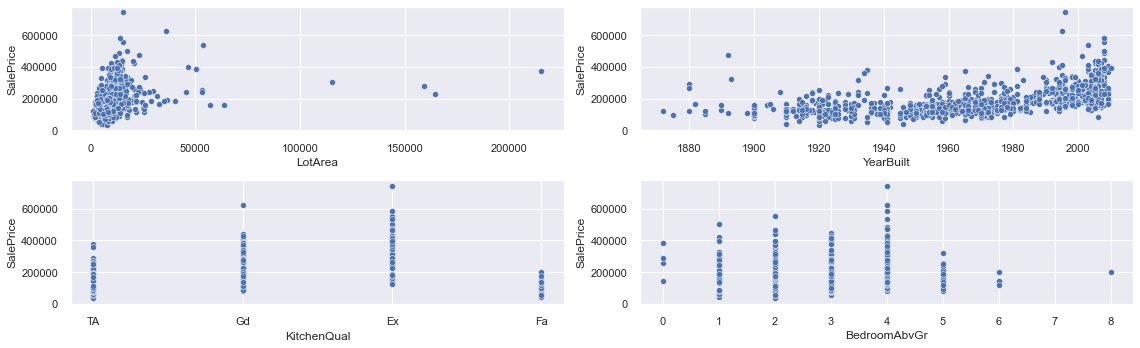

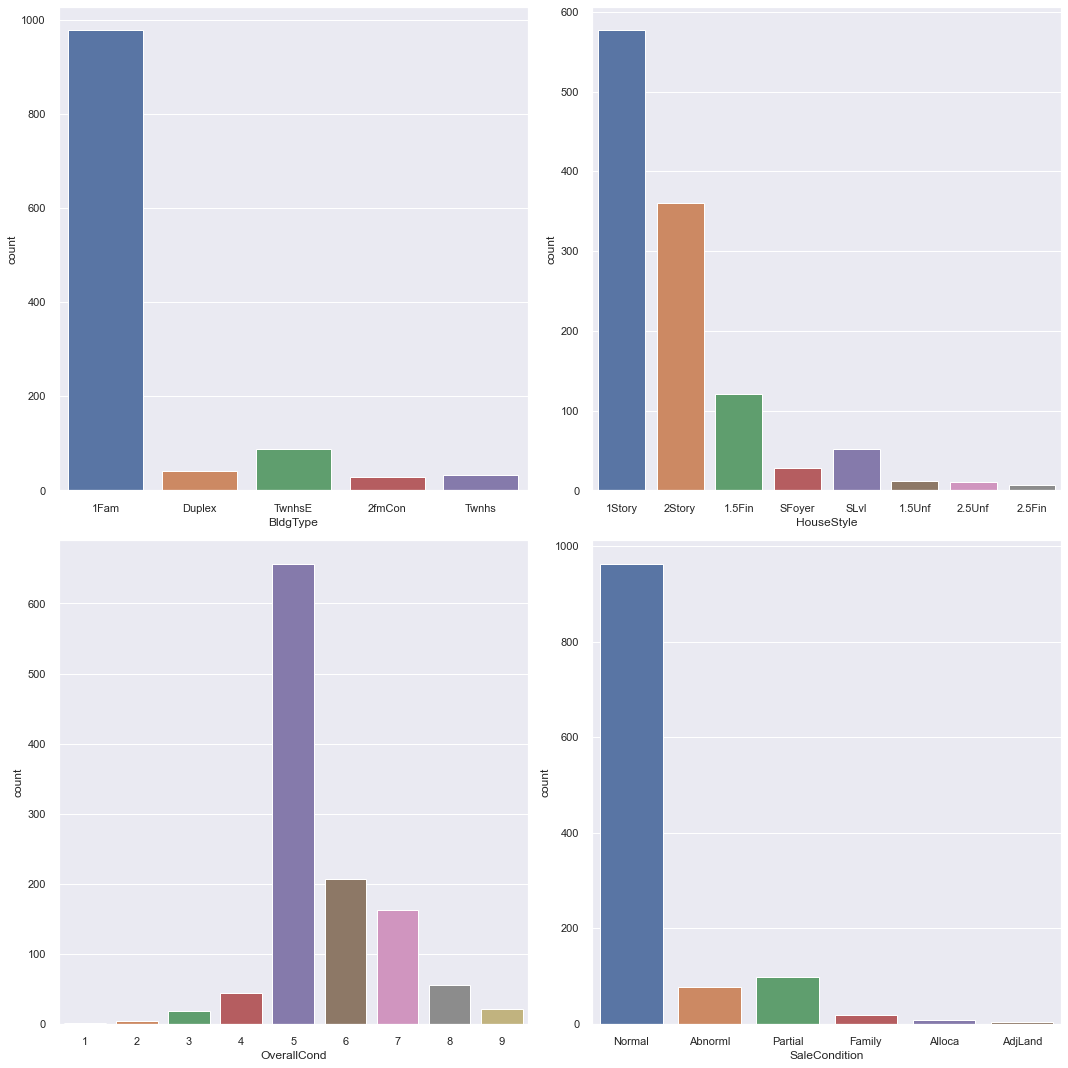

In [154]:
#visualizing house prices
# we are plotting both distribution plot and box plot to identify the distribution curve and also to find the outliers.
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(train_data['SalePrice'])
fig.add_subplot(2,1,2)
sns.boxplot(train_data['SalePrice'])
plt.tight_layout()

#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)

sns.scatterplot(train_data['LotArea'], train_data['SalePrice'])
fig.add_subplot(2,2,2)
sns.scatterplot(train_data['YearBuilt'],train_data['SalePrice'])
fig.add_subplot(2,2,3)
sns.scatterplot(train_data['KitchenQual'],train_data['SalePrice'])
fig.add_subplot(2,2,4)
sns.scatterplot(train_data['BedroomAbvGr'],train_data['SalePrice'])
fig.tight_layout()

#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
sns.countplot(train_data['BldgType'])
fig.add_subplot(2,2,2)
sns.countplot(train_data['HouseStyle'])
fig.add_subplot(2,2,3)
sns.countplot(train_data['OverallCond'])
fig.add_subplot(2,2,4)
sns.countplot(train_data['SaleCondition'])
plt.tight_layout()

pass

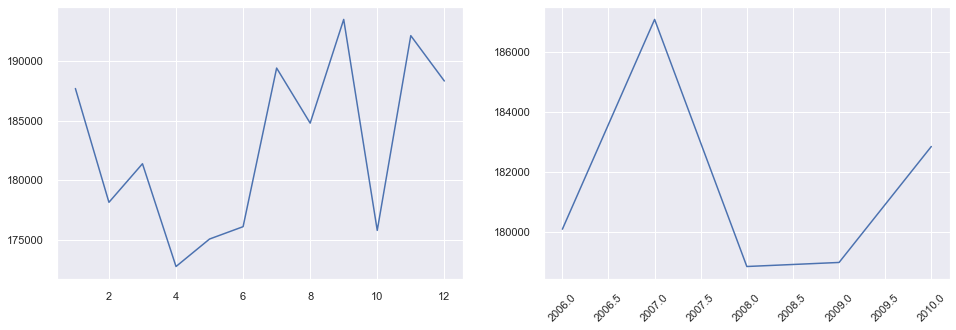

In [155]:
# train_data['date'] = pd.to_datetime(train_data['date'])
# train_data['month'] = train_data['date'].apply(lambda date:date.month)
# train_data['year'] = train_data['date'].apply(lambda date:date.year)

#data visualization house price vs months and years
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
plt.plot(train_data.groupby('MoSold').mean()['SalePrice'].astype(int))
fig.add_subplot(1,2,2)
plt.plot(train_data.groupby('YrSold').mean()['SalePrice'].astype(int))
plt.xticks(rotation=45)
pass

In [156]:
preprocessed_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,0,70.0,8400,0,0,0,0,0,0,...,0,0,0,0,0,0,6,2010,0,0
1066,60,0,59.0,7837,0,0,1,0,0,0,...,0,0,0,0,0,0,5,2009,0,0
638,30,0,67.0,8777,0,0,0,0,0,0,...,0,0,0,1,0,0,5,2008,0,0
799,50,0,60.0,7200,0,0,0,0,0,1,...,0,0,0,1,0,0,6,2007,0,0
380,50,0,50.0,5000,0,1,0,0,0,0,...,0,0,0,0,0,0,5,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,0,78.0,9317,0,0,1,0,0,0,...,0,0,0,0,0,0,3,2007,0,0
1130,50,0,65.0,7804,0,0,0,0,0,0,...,0,0,0,1,0,0,12,2009,0,0
1294,20,0,60.0,8172,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2006,0,0
860,50,0,55.0,7642,0,0,0,0,0,1,...,0,0,0,3,0,0,6,2007,0,0


In [169]:
# check if there are any Null values
print("total data rows:",len(preprocessed_train))

print("Null rows before\n")
print(5*"----")
print('\n')
print(preprocessed_train.isnull().sum().sort_values(ascending=False).head(10))
# drop some unnecessary columns
preprocessed_train = preprocessed_train.drop('PoolQC',axis=1)
preprocessed_train = preprocessed_train.drop('MiscFeature',axis=1)
preprocessed_train = preprocessed_train.drop('Alley',axis=1)
preprocessed_train = preprocessed_train.drop('Fence',axis=1)
print("Null rows after")
print(5*"----")
print('\n')
print(preprocessed_train.isnull().sum().sort_values(ascending=False).head(10))

# same thing to dev to drop all the values
preprocessed_dev = preprocessed_dev.drop('PoolQC',axis=1)
preprocessed_dev = preprocessed_dev.drop('MiscFeature',axis=1)
preprocessed_dev = preprocessed_dev.drop('Alley',axis=1)
preprocessed_dev = preprocessed_dev.drop('Fence',axis=1)

total data rows: 1168
Null rows before

--------------------


SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
dtype: int64
Null rows after
--------------------


SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
dtype: int64


### <font color='blue'> EDA observations</font>

Based on the plots above it is observed that the lotshpaes which are <font color='red'> IR1 and IR2</font> shows less sale count and the most of it sold are below half million. However Reg lot sizes happens to be sold more. And, also housestyles which are <font color='blue'> regular/IR1 and 1 and 2 story</font> have more sales.

### Feature Engineering
#### [ To Navigation](#Navigation)

#### Feature scaling
#### [ To Navigation](#Navigation)


In [110]:
preprocessed_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,0,70.0,8400,0,0,0,0,0,0,...,0,0,0,0,0,0,6,2010,0,0
1066,60,0,59.0,7837,0,1,0,0,0,0,...,40,0,0,0,0,0,5,2009,0,0
638,30,0,67.0,8777,0,0,0,0,0,0,...,0,164,0,0,0,0,5,2008,0,0
799,50,0,60.0,7200,0,0,0,0,1,0,...,0,264,0,0,0,0,6,2007,0,0
380,50,0,50.0,5000,0,0,0,0,0,0,...,0,242,0,0,0,0,5,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,0,78.0,9317,0,1,0,0,0,0,...,22,0,0,0,0,0,3,2007,0,0
1130,50,0,65.0,7804,0,0,0,0,0,0,...,44,0,0,0,0,0,12,2009,0,0
1294,20,0,60.0,8172,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2006,0,0
860,50,0,55.0,7642,0,0,0,0,1,0,...,240,0,0,0,0,0,6,2007,0,0


### 2a. EDA of Continuous Features

In [184]:
continuous_features = preprocessed_train.columns[preprocessed_train.dtypes != object].tolist()
continuous_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

In [185]:
for col in ['MSSubClass', 'OverallQual', 'OverallCond']:
    continuous_features.remove(col)

print('Continuous Features:\n')
print('\n'.join(continuous_features))

Continuous Features:

MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition


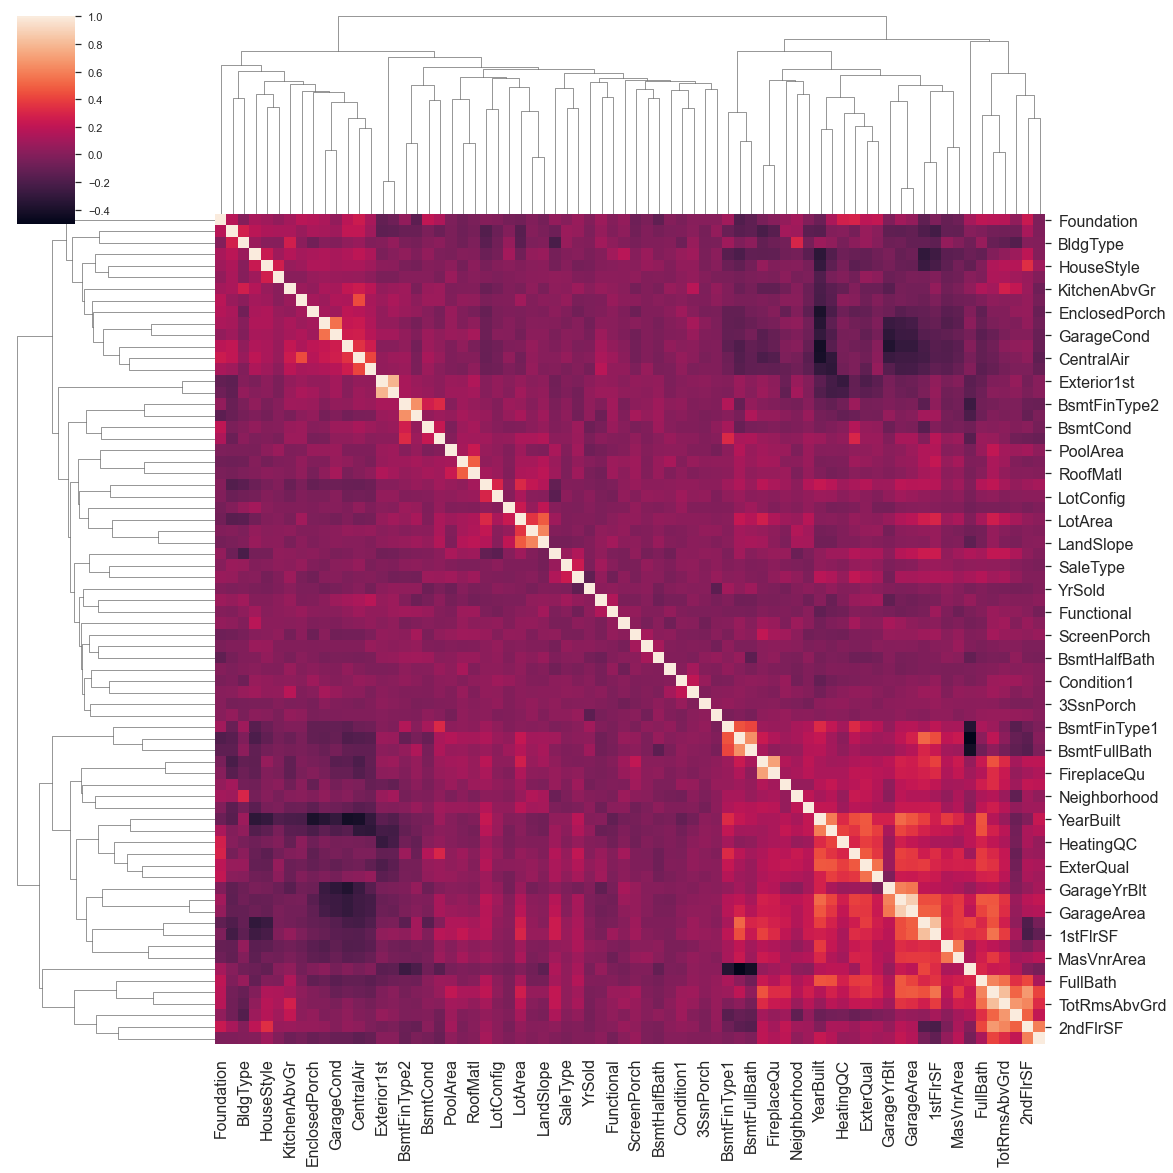

In [187]:
corrmat = preprocessed_train[continuous_features].corr()

cg = sns.clustermap(data=corrmat, figsize=(16, 16))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=16)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), fontsize=16)
plt.show()

In [190]:
correlation = train_data.corr()
# Rank the correlation by features
correlation['SalePrice'].sort_values(ascending=False) 

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePr

In [170]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
preprocessed_X_train = s_scaler.fit_transform(preprocessed_train.astype(np.float))
preprocessed_X_dev = s_scaler.transform(preprocessed_dev.astype(np.float))
preprocessed_X_train

array([[-0.8667643 , -0.45059115,  0.35953495, ...,  1.65006527,
        -0.27917094, -0.40818806],
       [ 0.07410996, -0.45059115,  0.04874271, ...,  0.89367742,
        -0.27917094, -0.40818806],
       [-0.63154574, -0.45059115,  0.27477343, ...,  0.13728958,
        -0.27917094, -0.40818806],
       ...,
       [-0.8667643 , -0.45059115,  0.07699655, ..., -1.37548612,
        -0.27917094, -0.40818806],
       [-0.16110861, -0.45059115, -0.06427265, ..., -0.61909827,
        -0.27917094, -0.40818806],
       [ 1.48542135, -0.45059115, -0.12078033, ...,  0.89367742,
        -0.27917094, -0.40818806]])

### Feature Selection
#### [ To Navigation](#Navigation)


### Method 1: Variance
#### [ To Navigation](#Navigation)

In [171]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(preprocessed_train)

VarianceThreshold(threshold=0)

In [172]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [173]:
preprocessed_train.columns[var_thres.get_support()]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [174]:
# check for any constant columns
constant_columns = [column for column in preprocessed_train.columns
                    if column not in preprocessed_train.columns[var_thres.get_support()]]

print(f" There are a total of {len(constant_columns)} constant columns.")
# for feature in constant_columns:
#      print(feature)
# data.drop(constant_columns,axis=1)

 There are a total of 0 constant columns.


### Method 2: Correlation
#### [ To Navigation](#Navigation)

In [302]:
# #Using Pearson Correlation
# plt.figure(figsize=(12,10))
# cor = preprocessed_train.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [ ]:
### 2a. EDA of Continuous Features

In [ ]:
for col in ['Id', 'MSSubClass', 'OverallQual', 'OverallCond']:
    continuous_features.remove(col)

print('Continuous Features:\n')
print('\n'.join(continuous_features))

In [ ]:
# It matters. If your data isn't normally distributed, do not use pearson. corr() has a parameter where you can switch 
# techniques. 
# If your data isn't normally distributed or approximately normally distributed, opt for spearman instead of pearson.

In [176]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr_list = []
    col_corr_set = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr_list.append(colname) # getting just the columns 
                col_corr_set.add((corr_matrix.columns[i], corr_matrix.columns[j])) # getting ordered pair of correlated.
    return (col_corr_list,col_corr_set)

In [177]:
col_corr_list, corr_set  = correlation(preprocessed_train, 0.7)
print(f"The total number of columns that are correlated are :{len(set(col_corr_list))}")
print(f"\nThe columns that are correlated are:")
print(5*"------")
for i in corr_set:
    print(i)

The total number of columns that are correlated are :6

The columns that are correlated are:
------------------------------
('Exterior2nd', 'Exterior1st')
('BldgType', 'MSSubClass')
('GarageArea', 'GarageCars')
('FireplaceQu', 'Fireplaces')
('TotRmsAbvGrd', 'GrLivArea')
('1stFlrSF', 'TotalBsmtSF')


### Method 3: Entropy or Information Gain
#### [ To Navigation](#Navigation)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(preprocessed_train, train_labels)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = preprocessed_train.columns
mutual_info.sort_values(ascending=False)


In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
pass

### Method 4: Mutual Information.

In [303]:
#No we Will select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(preprocessed_train, train_labels)
preprocessed_train.columns[sel_ten_cols.get_support()]

Index(['ExterCond', 'Foundation', 'BsmtQual', 'HeatingQC', 'FullBath',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageFinish',
       'GarageCars'],
      dtype='object')

In [304]:
#from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(preprocessed_train.fillna(0), train_labels)
mutual_info

array([2.95411383e-01, 1.22301474e-01, 1.79815255e-01, 1.75640536e-01,
       0.00000000e+00, 1.61817120e-02, 6.72361946e-02, 3.07111587e-02,
       0.00000000e+00, 1.83408436e-02, 5.96686919e-03, 4.46561555e-01,
       2.48455731e-02, 0.00000000e+00, 5.30658066e-02, 1.06634114e-01,
       5.23628728e-01, 9.71826705e-02, 3.34475171e-01, 2.37021002e-01,
       1.41684947e-02, 0.00000000e+00, 1.56124883e-01, 1.79452652e-01,
       1.00611723e-01, 7.66606305e-02, 3.08825109e-01, 2.25898128e-02,
       1.83726428e-01, 3.24332107e-01, 4.88058887e-02, 7.66173129e-02,
       1.56310892e-01, 1.44561873e-01, 5.49367719e-03, 3.43935778e-03,
       1.54818271e-01, 3.44174924e-01, 2.26523174e-02, 1.75172134e-01,
       7.05881562e-02, 4.68537246e-02, 2.95899063e-01, 2.13588741e-01,
       0.00000000e+00, 4.55246743e-01, 2.64614380e-02, 6.53900499e-03,
       2.75118996e-01, 7.78266933e-02, 5.67062698e-02, 2.34980665e-02,
       3.03410669e-01, 1.82977824e-01, 1.06924591e-02, 1.60541654e-01,
      

In [305]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = preprocessed_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.523629
GrLivArea       0.455247
Neighborhood    0.446562
GarageArea      0.363552
TotalBsmtSF     0.344175
                  ...   
Utilities       0.000000
LowQualFinSF    0.000000
Street          0.000000
MoSold          0.000000
PoolQC          0.000000
Length: 79, dtype: float64

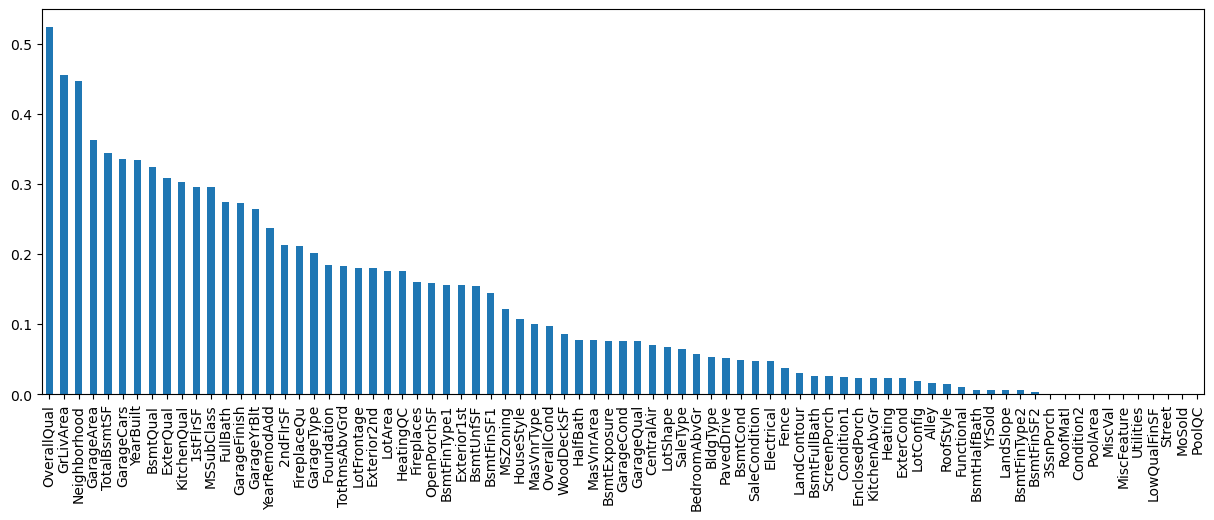

In [306]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))
pass

In [307]:
from sklearn.feature_selection import SelectPercentile

In [308]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(preprocessed_train.fillna(0), train_labels)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002A2C42608B0>)

In [309]:
selected_top_columns.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [310]:
preprocessed_train.columns[selected_top_columns.get_support()]

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Model aspects

In [311]:
from sklearn.feature_selection import SelectKBest # for feature selection
from sklearn.feature_selection import chi2 # for feature selection
from sklearn.ensemble import ExtraTreesClassifier # for feature importance
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(preprocessed_train,train_labels)

In [312]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(preprocessed_train.columns)

In [313]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1,sort=True)
featureScores.columns = ['features','Score']  #naming the dataframe columns
#df.sort_values(by=['col1'], ascending = False)
featureScores = featureScores.sort_values('Score',ascending = False)
#print(featureScores.nlargest(40,'Score'))  #print 40 best features

In [314]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
featureScores.head(40)
# pd.reset_option('display.float_format')
# featureScores.head(40)

,features,Score
3,LotArea,10616745.55863
74,MiscVal,5297499.70497
43,2ndFlrSF,381759.58719
70,PoolArea,346954.45774
33,BsmtFinSF1,325583.42785
35,BsmtFinSF2,279208.97177
36,BsmtUnfSF,237327.89392
25,MasVnrArea,232312.84826
44,LowQualFinSF,203853.31592
45,GrLivArea,156218.85770


In [ ]:
best_features_df = correlation['SalePrice'].sort_values(ascending=False).head(22)
final_df = train_data[best_features_df.index]
final_df

In [328]:
final_df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual', 'FullBath', 'BsmtQual',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'KitchenQual', 'FireplaceQu', 'BsmtFinSF1', 'HeatingQC', 'MasVnrType',
       'WoodDeckSF', '2ndFlrSF'],
      dtype='object')

In [346]:

def linear_regression(X_train, y_train, X_dev, y_dev):
    linear_regression = LinearRegression()
    linear_regression = linear_regression.fit(X_train, y_train)
    linear_reg_pred = linear_regression.predict(X_train)
    print("Linear Regression Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, linear_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, linear_reg_pred)))
    
    print("\nDev set:")
    linear_reg_pred = linear_regression.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, linear_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, linear_reg_pred)))


def decision_tree(X_train, y_train, X_dev, y_dev):
    dt_reg_num = DecisionTreeRegressor(random_state=5)
    dt_fit_reg_num = dt_reg_num.fit(X_train, y_train)
    pred_reg_num = dt_fit_reg_num.predict(X_train)
    print("Decision Tree Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, pred_reg_num))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, pred_reg_num)))
    
    print("\nDev set:")
    pred_reg_num = dt_fit_reg_num.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, pred_reg_num))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, pred_reg_num)))



def random_forest(X_train, y_train, X_dev, y_dev):
    Rforest_reg = RandomForestRegressor(random_state=5)
    Rforest_reg.fit(X_train, y_train)
    Rforest_pred = Rforest_reg.predict(X_train)
    print("Random Forest Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, Rforest_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, Rforest_pred)))

    print("\nDev set:")
    Rforest_pred = Rforest_reg.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, Rforest_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, Rforest_pred)))
    

def xgboost_reg(X_train, y_train, X_dev, y_dev):
    xbregressor = xgboost.XGBRegressor()
    xbregressor.fit(X_train, y_train)
    xb_pred = xbregressor.predict(X_train)
    print("XGBoost Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:",r2_score(y_train, xb_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, xb_pred)))
    
    print("\nDev set:")
    xb_pred = xbregressor.predict(X_dev)
    print("R^2 with r2_score function:",r2_score(y_dev, xb_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, xb_pred)))   
    


def GradBoost_reg(X_train, y_train, X_dev, y_dev):
    gb_reg = GradientBoostingRegressor(random_state=5)
    gb_reg.fit(X_train, y_train)
    gb_reg_pred = gb_reg.predict(X_train)
    
    print("GradientBoosting Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:",r2_score(y_train, gb_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, gb_reg_pred)))
    
    print("\nDev set:")
    gb_reg_pred = gb_reg.predict(X_dev)
    print("R^2 with r2_score function:",r2_score(y_dev, gb_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, gb_reg_pred)))   

In [358]:
linear_regression(X_train[final_df.columns], y_train_log, X_dev[final_df.columns], y_dev_log)
print(5*'--------')
decision_tree(X_train[final_df.columns], y_train_log, X_dev[final_df.columns], y_dev_log)
print(5*'--------')
random_forest(X_train[final_df.columns], y_train_log, X_dev[final_df.columns], y_dev_log)
print(5*'--------')
xgboost_reg(X_train[final_df.columns], y_train_log, X_dev[final_df.columns], y_dev_log)
print(5*'--------')
GradBoost_reg(X_train[final_df.columns], y_train_log, X_dev[final_df.columns], y_dev_log)
print(5*'--------')
print('*****THE END of Scoring*****')
print(5*'--------')

Linear Regression Algorithm:
Training set:
R^2 with r2_score function: 0.9443461380825626
RMSE: 0.09210927714779898

Dev set:
R^2 with r2_score function: 0.9152374991400549
RMSE: 0.12576894887437265
----------------------------------------
Decision Tree Algorithm:
Training set:
R^2 with r2_score function: 1.0
RMSE: 6.301841247231191e-16

Dev set:
R^2 with r2_score function: 0.9974780338137393
RMSE: 0.021694077139171698
----------------------------------------
Random Forest Algorithm:
Training set:
R^2 with r2_score function: 0.9998129513286044
RMSE: 0.005339898902952511

Dev set:
R^2 with r2_score function: 0.9983034534917234
RMSE: 0.01779321535812676
----------------------------------------
XGBoost Algorithm:
Training set:
R^2 with r2_score function: 0.9999925296705545
RMSE: 0.0010671503187149837

Dev set:
R^2 with r2_score function: 0.9985481325044573
RMSE: 0.01646019748888156
----------------------------------------
GradientBoosting Algorithm:
Training set:
R^2 with r2_score functio

In [ ]:
ensemble_pred = 0.25 * linear_reg_pred + 0.25 * xb_pred + 0.25 * gb_reg_pred + 0.25 * lasso_pred

# <font color='maroon'>Feature Importance</font>
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 40 features for the dataset.

In [315]:
from sklearn.ensemble import ExtraTreesClassifier # the library used
model = ExtraTreesClassifier()
model.fit(preprocessed_train,train_labels)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[1.49079807e-02 9.42032317e-03 2.52614129e-02 2.67392345e-02
 2.44644314e-04 4.29816277e-03 1.53966187e-02 6.24296055e-03
 6.02546954e-05 1.57710101e-02 3.14241101e-03 2.16083647e-02
 9.24572766e-03 6.17339680e-04 7.11403872e-03 1.20012591e-02
 2.03887557e-02 1.56555358e-02 2.62729609e-02 2.57907874e-02
 1.17449574e-02 8.58387821e-04 1.90678587e-02 1.92035011e-02
 1.45950490e-02 1.86156071e-02 8.57000307e-03 7.91889442e-03
 1.12008872e-02 1.19836754e-02 6.78911167e-03 1.72371614e-02
 1.92377694e-02 2.40074944e-02 7.21697828e-03 6.53082258e-03
 2.80265879e-02 2.73025626e-02 1.23578597e-03 1.48394917e-02
 3.61474326e-03 4.61958692e-03 2.85204647e-02 1.78169952e-02
 9.91128925e-04 2.88660133e-02 1.39319495e-02 4.27374715e-03
 9.77403901e-03 1.12389351e-02 1.67538660e-02 2.18195374e-03
 1.25614643e-02 2.28027236e-02 5.22238578e-03 1.33920529e-02
 1.53687249e-02 1.22819911e-02 2.44550679e-02 1.57291578e-02
 1.21148865e-02 2.74647110e-02 4.48037785e-03 3.96833024e-03
 4.35490690e-03 2.075426

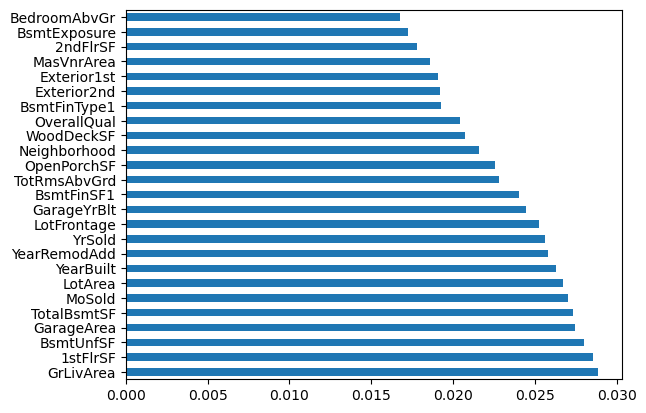

In [316]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=preprocessed_train.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

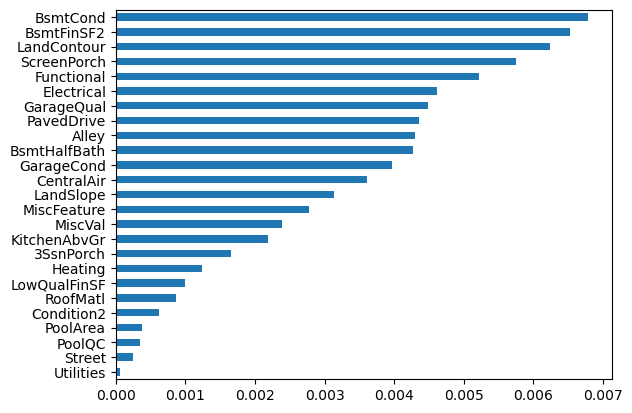

In [317]:
feat_importances = pd.Series(model.feature_importances_, index=preprocessed_train.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = preprocessed_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(preprocessed_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [319]:
lr = LinearRegression()
lr.fit(preprocessed_train, train_labels)
predicted_labels = lr.predict(preprocessed_dev)
importance = lr.coef_
feature_scores = []
# summarize feature importance
for i,v in enumerate(importance):
    feature_scores.append({'key': preprocessed_train.columns[i], 'score': abs(float(v))})
#     s = ': %0d, Score: %.5f' % (i,v)
#     print(preprocessed_train.columns[i] = v)
sorted_features = sorted(feature_scores, key=lambda i: i['score'], reverse=True)
print([feature['key'] for feature in sorted_features])
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

['PoolQC', 'Utilities', 'Street', 'KitchenAbvGr', 'OverallQual', 'Condition2', 'GarageCars', 'RoofMatl', 'LandSlope', 'ExterQual', 'BsmtFullBath', 'BsmtQual', 'KitchenQual', 'OverallCond', 'RoofStyle', 'MiscFeature', 'Functional', 'SaleCondition', 'PavedDrive', 'Condition1', 'Fireplaces', 'GarageQual', 'MasVnrType', 'TotRmsAbvGrd', 'Alley', 'BldgType', 'BsmtExposure', 'BedroomAbvGr', 'CentralAir', 'BsmtCond', 'Foundation', 'LotShape', 'SaleType', 'Exterior1st', 'Exterior2nd', 'FullBath', 'Heating', 'MSZoning', 'BsmtHalfBath', 'LandContour', 'GarageCond', 'Neighborhood', 'FireplaceQu', 'ExterCond', 'LotConfig', 'BsmtFinType2', 'HalfBath', 'GarageFinish', 'BsmtFinType1', 'HeatingQC', 'Electrical', 'GarageType', 'PoolArea', 'YearBuilt', 'Fence', 'HouseStyle', 'MoSold', 'MSSubClass', '3SsnPorch', 'ScreenPorch', 'YrSold', 'GrLivArea', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', '2ndFlrSF', 'EnclosedPorch', 'GarageArea', 'WoodDeckSF', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', 'OpenPorchSF', 

In [324]:
# X = Data.drop('price',axis =1).values
# y = Data['price'].values
# preprocessed_X_train

# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(preprocessed_X_train, train_labels)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

#predicting the test set result
predict_labels = regressor.predict(preprocessed_X_dev)
#put results as a DataFrame

coeff_df = pd.DataFrame(regressor.coef_, train_features.drop(['BldgType','HouseStyle','OverallCond','SaleCondition'], axis=1).columns, columns=['Coefficient']) 
coeff_df

181426.6509806086
[-6.15032567e+03 -6.66250205e+02 -1.17513895e+03  3.20903868e+03
 -9.19108813e+02  6.12690242e+02 -5.07395092e+02 -1.87615008e+03
  5.94560720e+02  3.00188137e+03  5.53913439e+03 -3.84195785e+03
 -3.56253479e+03 -2.34813843e+03 -1.44223582e+02  1.74498237e+04
  6.61595781e+03  6.58577038e+03  7.42949011e+02  4.67619806e+03
 -6.57064276e+03 -4.64967078e+03  3.95085061e+03 -2.10119692e+03
  3.73263054e+03  4.28975316e+03  3.72786160e+02 -2.32710713e+03
  8.46952488e+03 -1.66810754e+03  3.06359449e+03  1.80485173e+03
 -1.02256118e+17 -1.89462087e+03 -3.52422787e+16 -9.94258157e+16
  9.81587886e+16 -5.52652253e+02  7.39352013e+02 -5.77147926e+02
  4.43520805e+02  1.71844348e+17  1.95351956e+17  2.12817553e+16
 -2.33065832e+17  5.37945097e+03 -1.59246253e+02  2.04409198e+03
  3.81290718e+02 -2.01441142e+03 -2.55489356e+03  5.14972406e+03
  5.75227168e+03 -3.27306792e+03  1.85393006e+03  1.77183361e+03
  3.34155203e+02 -3.01952372e+03  3.03789693e+02  8.86944633e+03
  1.645

ValueError: Shape of passed values is (75, 1), indices imply (76, 1)

### Residuals
By visualizing the residual we can see that is normally distributed (proof of having linear relationship with the dependent variable)
#### [ To Navigation](#Navigation)

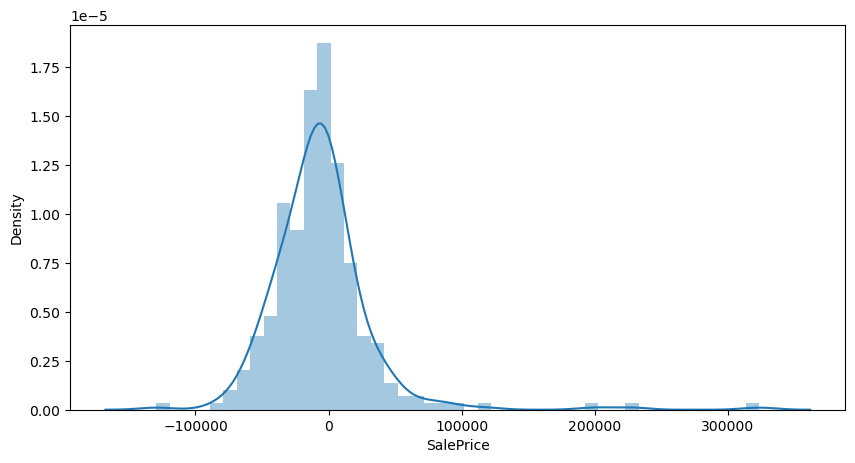

In [325]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (dev_labels- predict_labels)
sns.distplot(residuals)
pass

### Actual Output vs Predicted Output 
measure how far our predictions are from the real house prices.
#### [ To Navigation](#Navigation)

mean_absolute_error: 25238.73541374919
mean_squared_error: 1608823010.0913026
root mean_squared_error: 40110.13600190484
explained_variance_score: 0.7950286806268394


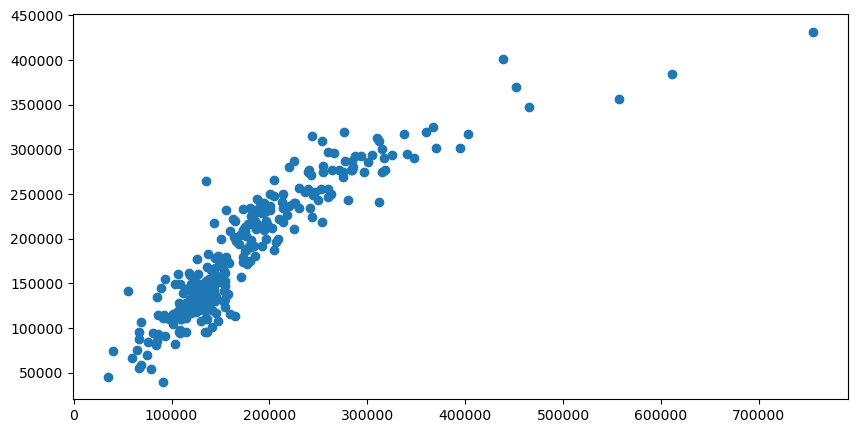

In [326]:
#compare actual output values(dev_labels) with predicted values(predict_labels)
# dev_labels = regressor.predict(preprocessed_X_dev)
df = pd.DataFrame({'Actual': dev_labels, 'Predicted': predict_labels})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('mean_absolute_error:', metrics.mean_absolute_error(dev_labels, predict_labels))  
print('mean_squared_error:', metrics.mean_squared_error(dev_labels, predict_labels))  
print('root mean_squared_error:', np.sqrt(metrics.mean_squared_error(dev_labels, predict_labels)))
print('explained_variance_score:',metrics.explained_variance_score(dev_labels,predict_labels))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(dev_labels,predict_labels)

pass

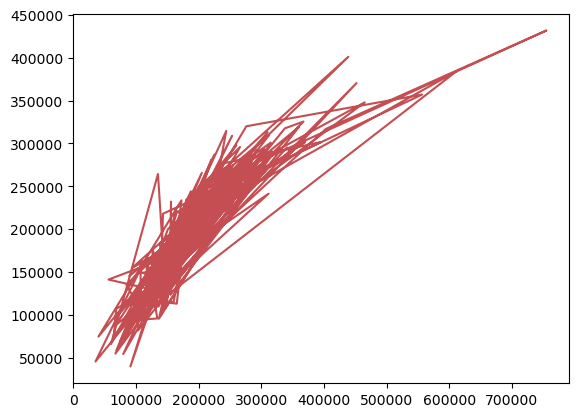

In [327]:
# Perfect predictions
plt.plot(dev_labels,predict_labels,'r')
pass

In [ ]:
def confusion_matrix_plot(conf_matrix):
    """ Confusion matrix matplotlib plot
    # param conf_matrix: nested list of TP, TN, FP, FN
    # return: None
    """
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()
    

def P5():    

### STUDENT START ###
    #Train on the mini train set.
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')        
    knn.fit(mini_train_data, mini_train_labels)

    # Dev Set perf eval. 
    predicted_dev_labels = knn.predict(dev_data)
    #print('Predicted values:',predicted_dev_labels)    
    
    # check accuracy of our model on the dev data
    score = knn.score(dev_data, dev_labels)
    print ("For k = ", 1, " , miscalssified records = ",sum(dev_labels != predicted_dev_labels) , ", Accuracy = ", score*100, "%" )

    #produce a confusion matrix.
    conf_matrix = confusion_matrix(dev_labels, predicted_dev_labels, labels=np.unique(dev_labels)) 
    # TODO - debug confusion matric plot
    #confusion_display = ConfusionMatrixDisplay(conf_matrix).plot()
    confusion_matrix_plot(conf_matrix)
    # Now Check precision, recall, and F1 metrics
    print('Precision score: %.3f' % precision_score(dev_labels, predicted_dev_labels, average='macro'))
    print('Recall score: %.3f' % recall_score(dev_labels, predicted_dev_labels, average='macro'))
    print('F1 score %.3f' % f1_score(dev_labels, predicted_dev_labels, average='macro'))
    
    # Display the images of these most often confused digits.(As per confustion matrix it is 9 and 4)
    confusion_indices = []
    for i in range(len(dev_labels)):       
        if (int(dev_labels[i]) == 9 and int(predicted_dev_labels[i]) == 4) or (int(dev_labels[i]) == 4 and int(predicted_dev_labels[i]) == 9):
            confusion_indices.append(i)
            
    
    # Plotting of images
    imagecount = 1
    for i in confusion_indices:      
        ax = plt.subplot(4,4,imagecount)
        ax.set_xticks([])
        ax.set_yticks([])
        intlabel = int(dev_labels[i]) # converting to integer 
        intpred = int(predicted_dev_labels[i]) # converting to integer
        plt.subplots_adjust(hspace=0.7)
        plt.title('l{label},p{predictions}'.format(label=intlabel,predictions=intpred))
        plt.imshow(np.asfarray(dev_data[i]).reshape((28,28)), cmap=plt.get_cmap('gray'))
        imagecount = imagecount + 1 